# Installation

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Access Google Drive Folder
import os
COLAB_PATH = "gdrive/MyDrive"
os.chdir(COLAB_PATH)

In [ ]:
# Enter to yolov7 folder
%cd yolov7
!ls

/content/gdrive/MyDrive/yolov7
cfg			     export.py	  README.md		traced_model.pt
coco			     figure	  requirements_gpu.txt	train2017.zip
coco2017labels-segments.zip  hubconf.py   requirements.txt	train_aux.py
data			     inference	  runs			train.py
deploy			     LICENSE.md   scripts		utils
detect_mask.py		     models	  test2017.zip		val2017.zip
detect_pose.py		     okokok.png   test_images_folder	weights
detect.py		     paper	  test.py		yolov7.pt
dio_xalia.png		     __pycache__  tools			yolov7_training.pt


In [ ]:
# Check GPU
import torch

torch.cuda.is_available()

False

In [ ]:
# Download pretrained weights
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
!python detect.py --weights yolov7.pt --source inference/images/bus.jpg

Namespace(weights=['yolov7.pt'], source='inference/images/bus.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, apply_custom_classifier=False, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 52f8176 torch 2.1.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
pred before NMS
 Rescale

### Functions

In [ ]:
# Function to Show Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def showImage(path):
  img = mpimg.imread(path)
  plt.figure(figsize=(20,20))
  plt.axis("off")
  plt.imshow(img)
  plt.show()


# Function to Show Cropped images
def showImageCropped(path, x0, y0, x1, y1):
  img = mpimg.imread(path)
  plt.figure(figsize=(20,20))
  plt.axis("off")
  cropped_image = img[y0:y1, x0:x1]
  plt.imshow(cropped_image)
  plt.show()

# Detection

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Access Google Drive Folder
import os
COLAB_PATH = "gdrive/MyDrive"
os.chdir(COLAB_PATH)

In [ ]:
# Enter to yolov7 folder
%cd yolov7
!ls

## Detection on Images

In [ ]:
# Detection on Image
!python detect.py --weights yolov7.pt --conf-thres 0.5 --img-size 640 --source inference/images/

In [ ]:
# Show Detection Result
showImage("runs/detect/exp65/zidane.jpg")

## Detection on Video

In [ ]:
# Download Video
!gdown https://drive.google.com/uc?id=1pg04n7WWRgiw2qL2Cc9cXhV4x8wlHiQ7

In [ ]:
# Move to inference folder
!mv road.mp4 inference/

In [ ]:
# See the inference folder
!ls inference/

In [ ]:
# Detection on Video
!python detect.py --weights yolov7.pt --conf-thres 0.5 --img-size 640 --source inference/road.mp4

In [ ]:
# Check Detection Result Folder
!ls runs/detect

# Carpet Training (carpet, no-carpet)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Access Google Drive Folder
import os
COLAB_PATH = "gdrive/MyDrive"
os.chdir(COLAB_PATH)

In [ ]:
# Enter to yolov7 folder
%cd yolov7
!ls

/content/gdrive/MyDrive/yolov7
cfg			     inference		   test.py
coco			     LICENSE.md		   tools
coco2017labels-segments.zip  models		   traced_model.pt
data			     okokok.png		   train2017.zip
deploy			     paper		   train_aux.py
detect_mask.py		     __pycache__	   train.py
detect_pose.py		     README.md		   utils
detect.py		     requirements_gpu.txt  val2017.zip
dio_xalia.png		     requirements.txt	   yolov7.pt
export.py		     runs		   yolov7_training.pt
figure			     scripts
hubconf.py		     test2017.zip


In [ ]:
# Check Dataset
!ls data/

carpet_dataset		     carpet.yaml	      hyp.scratch.p6.yaml
carpet_dataset.zip	     coco.yaml		      hyp.scratch.tiny.yaml
carpet_straight_dataset      hyp.scratch.custom.yaml  split_dataset.py
carpet_straight_dataset.zip  hyp.scratch.mask.yaml
carpet_straight.yaml	     hyp.scratch.p5.yaml


In [ ]:
# Unzip Dataset
!unzip data/carpet_dataset.zip -d ./data

Archive:  data/carpet_dataset.zip
replace ./data/carpet_dataset/images/test/03F8I3VII4WB.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Download pre-trained weight for training
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
# Train
!python train.py --batch-size 8 --device 0 --data data/carpet.yaml --img 640 640 --cfg cfg/training/yolov7-carpet.yaml --weights yolov7_training.pt --name yolov7-carpet --hyp data/hyp.scratch.custom.yaml --epochs 300

In [ ]:
# See the accuracy
%load_ext tensorboard

%tensorboard --logdir runs/train

## Continue Training

In [ ]:
!python test.py --data data/carpet.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights  runs/train/yolov7-carpet/weights/best.pt --name yolov7_640_test --task test


In [ ]:
# Continue Training
!python train.py --batch-size 8 --device 0 --data data/face-mask.yaml --img 640 640 --cfg cfg/training/yolov7-face_mask.yaml --weights runs/train/yolov7-face-mask/weights/last.pt --name yolov7-face-mask --hyp data/hyp.scratch.custom.yaml --epochs 300 --resume

## Carpet Detection

In [ ]:
# Download Image
!gdown https://drive.google.com/uc?id=1XhoXpam5K6lCXJ6338Uow6L1P0iPFuNV

In [ ]:
# Move to inference folder
!mv face-mask.png inference/

In [ ]:
# Detection on Image
!python detect.py --weights runs/train/yolov7-carpet/weights/best.pt  --apply-custom-classifier True --conf-thres 0.05 --img-size 640 --source  test_images_folder/8.png #data/carpet_dataset/images/test

Namespace(weights=['runs/train/yolov7-carpet/weights/best.pt'], source='test_images_folder/8.png', img_size=640, conf_thres=0.05, iou_thres=0.45, apply_custom_classifier=True, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 52f8176 torch 2.1.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ig

In [ ]:
showImage("runs/detect/exp62/8.png")
#showImageCropped("runs/detect/exp16/1.jpg", 132, 48, 338, 214)

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.94 --img-size 640 --source inference/images/bus.jpg

# Carpet Straight DETECTION (GOOD Carpet/BAD Carpet)

## Train Dataset

In [ ]:
# Enter to yolov7 folder
%cd yolov7
!ls

/content/gdrive/MyDrive/yolov7
cfg			     inference		   test.py
coco			     LICENSE.md		   tools
coco2017labels-segments.zip  models		   traced_model.pt
data			     okokok.png		   train2017.zip
deploy			     paper		   train_aux.py
detect_mask.py		     __pycache__	   train.py
detect_pose.py		     README.md		   utils
detect.py		     requirements_gpu.txt  val2017.zip
dio_xalia.png		     requirements.txt	   yolov7.pt
export.py		     runs		   yolov7_training.pt
figure			     scripts
hubconf.py		     test2017.zip


In [ ]:
# Check Dataset
!ls data/

carpet_dataset	    hyp.scratch.custom.yaml  hyp.scratch.tiny.yaml
carpet_dataset.zip  hyp.scratch.mask.yaml    split_dataset.py
carpet.yaml	    hyp.scratch.p5.yaml
coco.yaml	    hyp.scratch.p6.yaml


In [ ]:
# Unzip Dataset
!unzip data/carpet_straight_dataset.zip -d ./data

In [ ]:
# Download pre-trained weight for training
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
# Train
!python train.py --batch-size 8 --device 0 --data data/carpet_straight.yaml --img 640 640 --cfg cfg/training/yolov7-carpet_straight.yaml --weights yolov7_training.pt --name yolov7-carpet-straight --hyp data/hyp.scratch.custom.yaml --epochs 300

In [ ]:
# See the accuracy
%load_ext tensorboard

%tensorboard --logdir runs/train

## Test Dataset

In [ ]:
!python test.py --data  data/carpet_straight.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights  runs/train/yolov7-carpet-straight/weights/best.pt --name yolov7_640_test_straight_detection --task test

Traceback (most recent call last):
  File "/content/gdrive/MyDrive/yolov7/test.py", line 12, in <module>
    from models.experimental import attempt_load
  File "/content/gdrive/MyDrive/yolov7/models/experimental.py", line 6, in <module>
    from models.common import Conv, DWConv
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 975, in get_code
  File "<frozen importlib._bootstrap_external>", line 1074, in get_data
KeyboardInterrupt
^C


In [ ]:
# Continue Training
!python train.py --batch-size 8 --device 0 --data data/carpet_straight.yaml --img 640 640 --cfg cfg/training/yolov7-carpet_straight.yaml --weights runs/train/yolov7-carpet-straight/weights/last.pt --name yolov7-carpet-straight --hyp data/hyp.scratch.custom.yaml --epochs 300 --resume

In [ ]:
!python detect.py --weights runs/train/yolov7-carpet-straight/weights/best.pt --conf-thres 0.05 --img-size 640 --source test_images_folder/8.png #data/carpet_dataset/images/test

Namespace(weights=['runs/train/yolov7-carpet-straight/weights/best.pt'], source='test_images_folder/8.png', img_size=640, conf_thres=0.05, iou_thres=0.45, apply_custom_classifier=False, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 52f8176 torch 2.1.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  

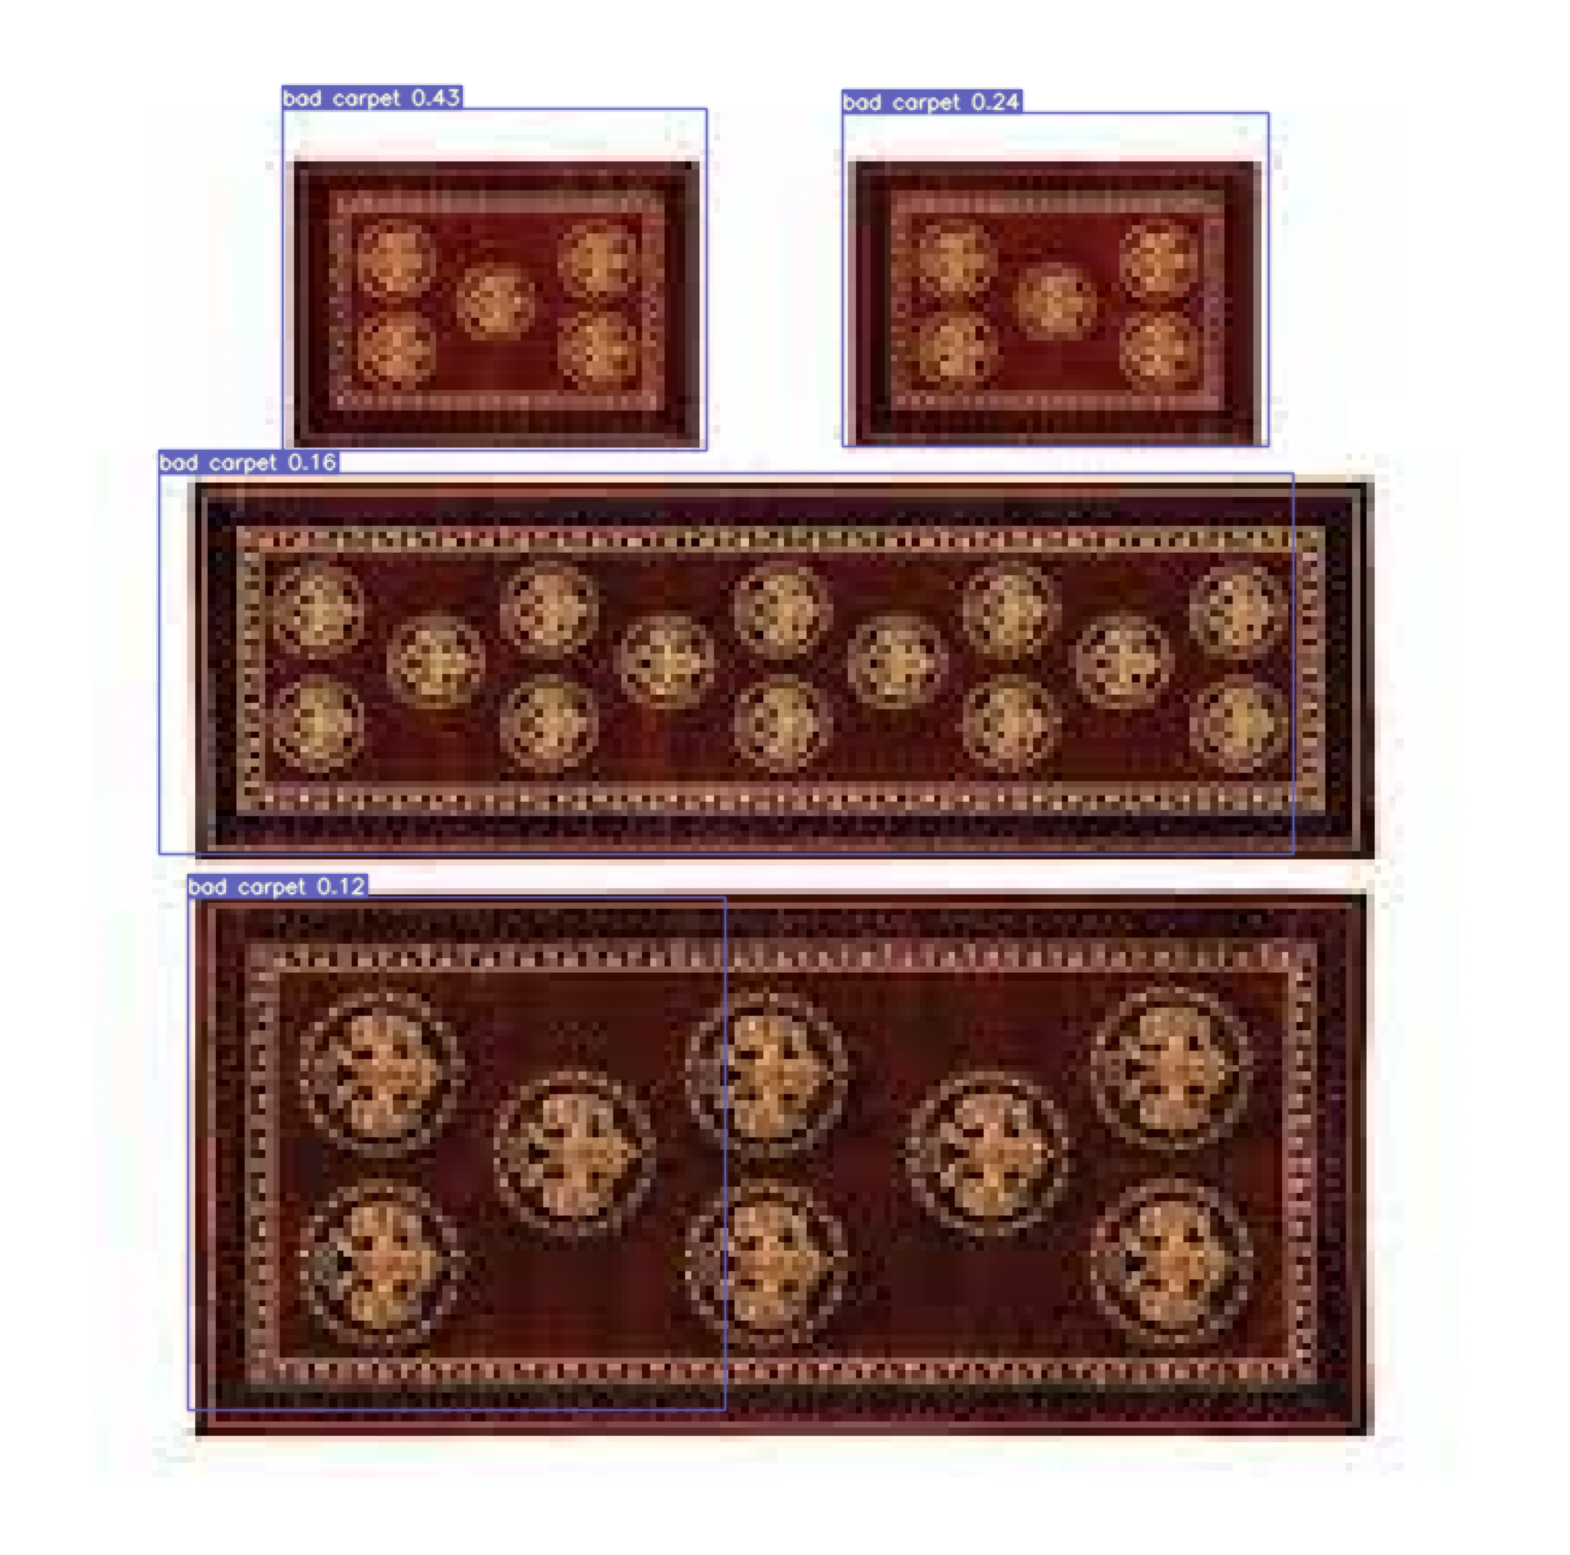

In [ ]:
showImage("runs/detect/exp63/7.png")

In [ ]:
showImageCropped("runs/detect/exp20/7.png", 132, 48, 338, 214)